# Multi-Class Logistic Regression
Modeling the relationship between the multiple outcome classes (dependent variable) and the independent variables.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import statsmodels.api as sm

In [13]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)

In [14]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=69)

In [16]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
print("Classification Report:")
print()
print(classification_report(y_test, y_pred))

# Precision = TP/(TP+FP) i.e. percentage of positives that are actually true positives
# Recall = TP/(TP+FN) i.e. percentage of true positives identified correctly
# F1-score = 2*(precision*recall)/(precision+recall) i.e. the harmonic mean of precision and recall

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [18]:
class_names = data.target_names
conf_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Actual {class_name}" for class_name in class_names], columns=[f"Predicted {class_name}" for class_name in class_names])
print("Confusion Matrix:")
print(conf_df)

Confusion Matrix:
                   Predicted setosa  Predicted versicolor  Predicted virginica
Actual setosa                    10                     0                    0
Actual versicolor                 0                     8                    0
Actual virginica                  0                     1                   11


In [19]:
df = pd.DataFrame(X_test, columns=data.feature_names)
df['Actual Class'] = [data.target_names[i] for i in y_test]
df['Predicted Class'] = [data.target_names[i] for i in y_pred]

In [20]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Actual Class', 'Predicted Class'],
      dtype='object')

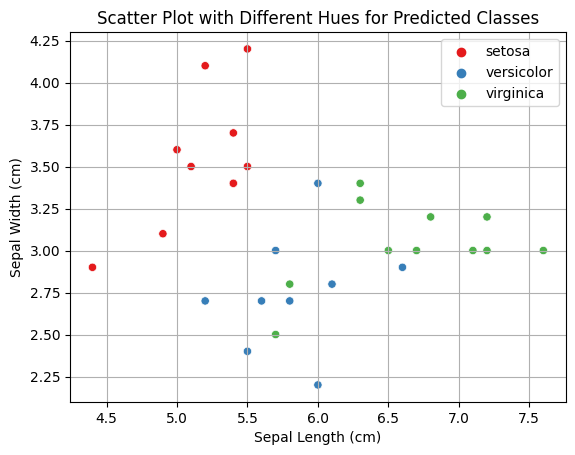

In [21]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df, hue='Predicted Class', palette='Set1')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot with Different Hues for Predicted Classes')
plt.legend()
plt.grid(True)
plt.show()